# 1. Preparação do notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#2. Geração das séries temporais

## 2.1. Sem outliers

In [2]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

series_dict = {}

for i in range(num_series):
    series = np.zeros(n)
    regime_change_points = np.linspace(0, n-1, 5, dtype=int)  # 5 mudanças de regime ao longo do tempo
    current_drift = 0.01
    current_volatility = 1

    for t in range(n):
        if t in regime_change_points:
            current_drift *= np.random.choice([-2, 2])  # Muda direção da tendência
            current_volatility *= np.random.choice([0.5, 1.5])  # Muda volatilidade
        series[t] = series[t-1] + np.random.normal(current_drift, current_volatility)

    series_dict[f"regime_switching_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

,regime_switching_1,regime_switching_2,regime_switching_3,regime_switching_4,regime_switching_5,regime_switching_6,regime_switching_7,regime_switching_8,regime_switching_9,regime_switching_10
0,-1.687820,-0.283843,0.126658,0.377150,-0.765880,-1.355139,0.669358,-0.694463,0.065922,-0.314608
1,-1.229467,-0.365411,-0.123630,1.177021,-1.973428,-0.585280,0.814437,-1.024517,0.234078,-0.685179
2,-0.830905,-0.084121,-0.025177,0.623488,-0.997694,-0.039636,0.272728,-1.427142,-0.571165,-1.355646
3,0.664868,-0.326946,-0.096295,0.768356,-1.361355,-0.040746,0.740739,-0.564950,-0.337167,-1.355416
4,-0.226449,0.679964,-0.601503,0.572884,-2.230610,-0.282606,0.954610,-0.636281,-0.023799,-1.782896


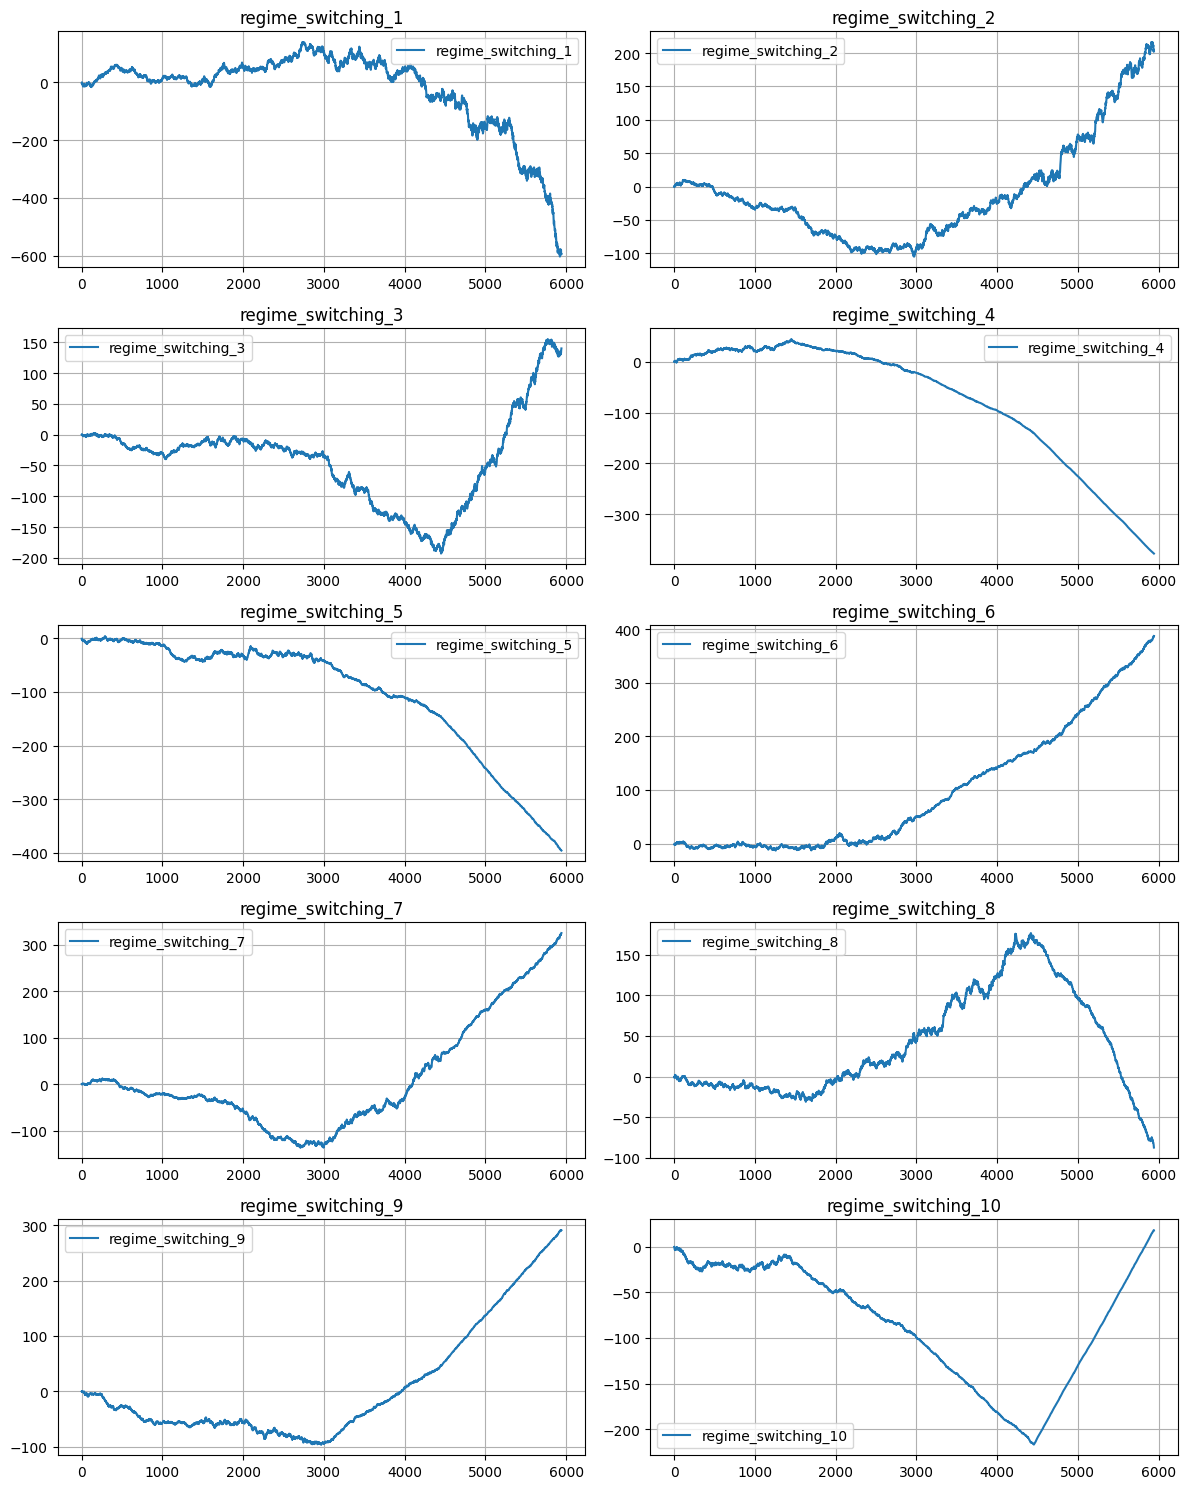

In [3]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [4]:
################################
##### Detecção de outliers #####
################################

# Função para calcular o percentual de outliers usando o método IQR
def calcular_percentual_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = (series < lim_inf) | (series > lim_sup)
    return np.mean(outliers) * 100

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df[col]) for col in df.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
regime_switching_1,9.93
regime_switching_2,10.05
regime_switching_3,5.13
regime_switching_4,0.00
regime_switching_5,6.93
regime_switching_6,0.00
regime_switching_7,5.55
regime_switching_8,0.00
regime_switching_9,8.87
regime_switching_10,0.00


## 2.2. Com outliers

In [5]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

series_dict = {}

for i in range(num_series):
    series = np.zeros(n)
    regime_change_points = np.linspace(0, n-1, 5, dtype=int)  # 5 mudanças de regime ao longo do tempo
    current_drift = 0.01
    current_volatility = 1

    for t in range(n):
        if t in regime_change_points:
            current_drift *= np.random.choice([-2, 2])  # Muda direção da tendência
            current_volatility *= np.random.choice([0.5, 1.5])  # Muda volatilidade
        series[t] = series[t-1] + np.random.normal(current_drift, current_volatility)

    series_dict[f"regime_switching_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

#################################
##### Aplicação de Outliers #####
#################################

# Função para adicionar outliers em uma série
#def add_outliers(series, outlier_fraction=0.4):
#    n = len(series)
#    num_outliers = int(n * outlier_fraction)  # Total de outliers a serem inseridos

    # Dividir os outliers igualmente entre os quartis
#    quartile_indices = np.array_split(np.random.permutation(n), 4)  # Divisão em quartis

    # Gerar valores de outliers (aumentando ou diminuindo em relação ao valor original)
#    for q_indices in quartile_indices:
#        num_q_outliers = len(q_indices) // 2  # Metade dos índices do quartil serão outliers
#        outlier_indices = np.random.choice(q_indices, num_q_outliers, replace=False)

        # Criar outliers aumentando ou diminuindo os valores em múltiplos do desvio padrão
#        std_dev = np.std(series)
#        series[outlier_indices] += np.random.choice([-1, 1], num_q_outliers) * np.random.uniform(3, 5) * std_dev

#    return series

def add_outliers(series, outlier_fraction=0.05):
    n = len(series)
    num_outliers = int(n * outlier_fraction)  # Definir a quantidade de outliers

    # Selecionar índices aleatórios para inserção dos outliers
    outlier_indices = np.random.choice(n, num_outliers, replace=False)

    # Gerar valores de outliers sem modificar drasticamente a estrutura
    std_dev = np.std(series)
    series[outlier_indices] += np.random.choice([-1, 1], num_outliers) * np.random.uniform(2, 4) * std_dev

    return series

# Aplicar a função de adição de outliers a cada série
df_outliers = df.apply(add_outliers, axis=0)
df_outliers.head()

,regime_switching_1,regime_switching_2,regime_switching_3,regime_switching_4,regime_switching_5,regime_switching_6,regime_switching_7,regime_switching_8,regime_switching_9,regime_switching_10
0,-1.687820,-0.283843,0.126658,0.377150,-0.765880,-1.355139,0.669358,-0.694463,0.065922,-0.314608
1,-1.229467,-0.365411,-0.123630,1.177021,258.615483,297.220884,0.814437,-1.024517,0.234078,-0.685179
2,-0.830905,-0.084121,-0.025177,0.623488,-0.997694,-0.039636,0.272728,216.373252,-0.571165,-1.355646
3,0.664868,-0.326946,-0.096295,0.768356,-1.361355,-0.040746,0.740739,217.235444,-0.337167,-1.355416
4,-0.226449,0.679964,-0.601503,0.572884,-2.230610,-0.282606,0.954610,-0.636281,-0.023799,-1.782896


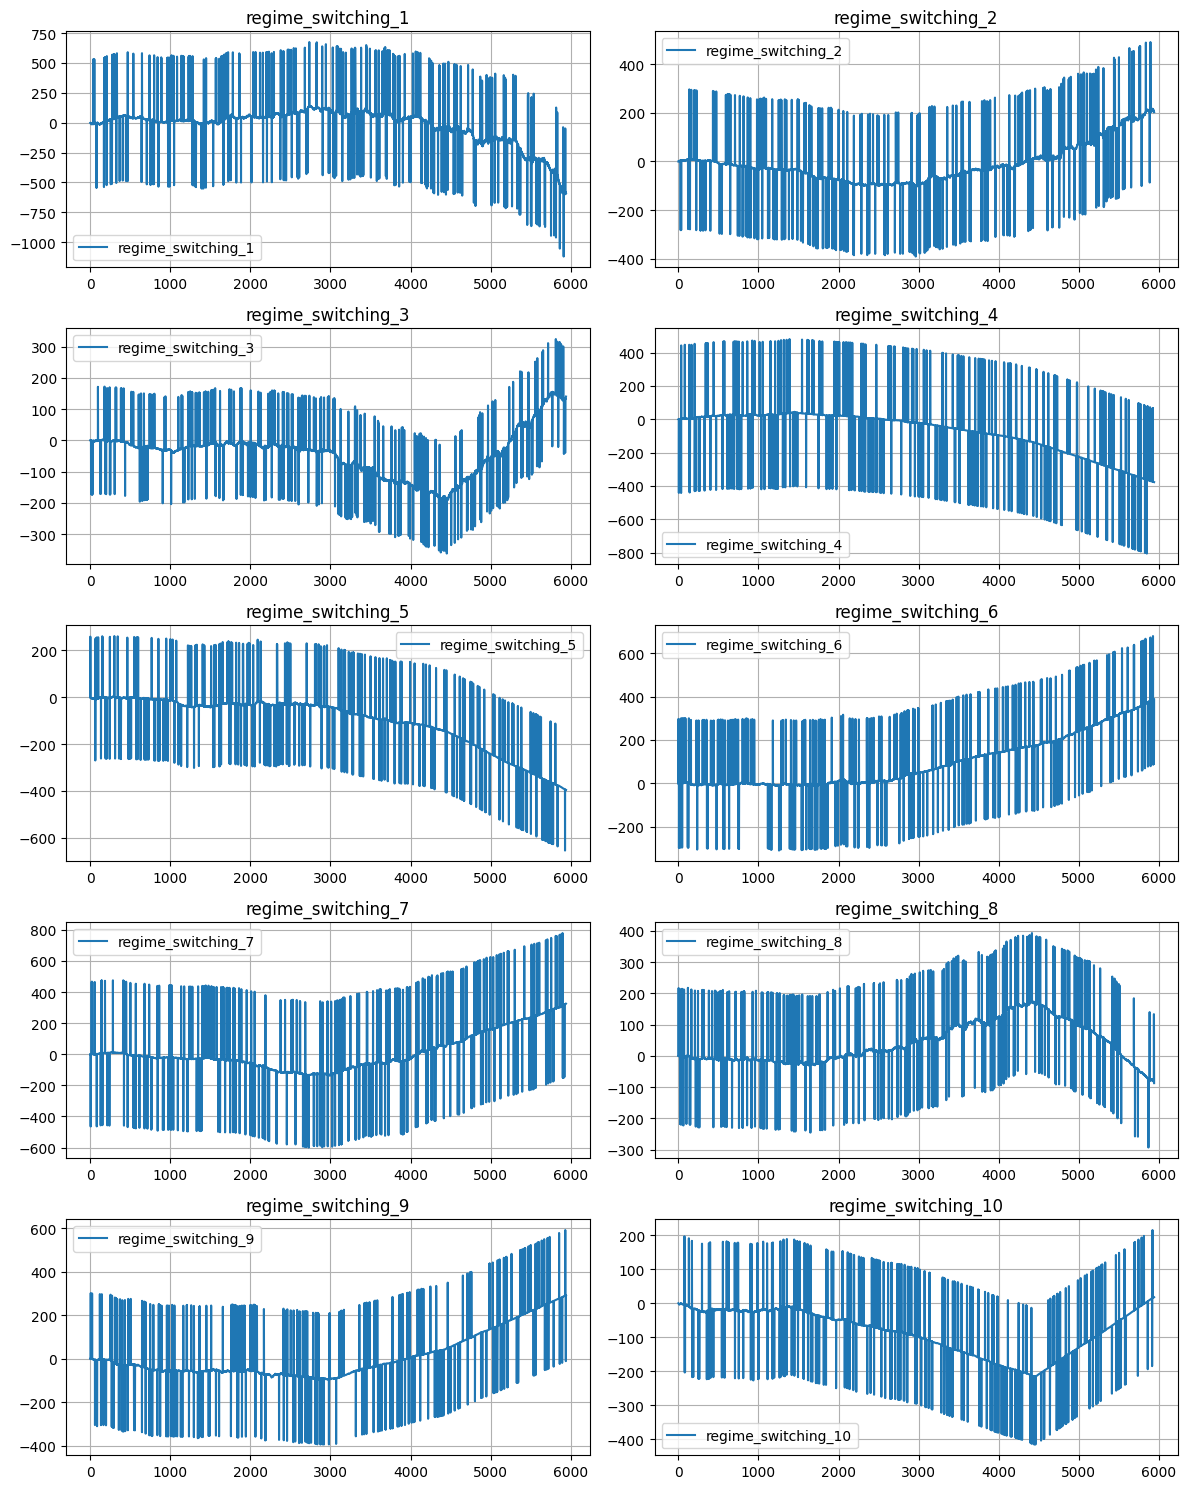

In [6]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df_outliers[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [7]:
################################
##### Detecção de outliers #####
################################

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df_outliers[col]) for col in df_outliers.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
regime_switching_1,14.05
regime_switching_2,13.73
regime_switching_3,7.64
regime_switching_4,4.02
regime_switching_5,5.57
regime_switching_6,1.62
regime_switching_7,8.58
regime_switching_8,2.20
regime_switching_9,8.88
regime_switching_10,1.67


# 3. Exportação dos dados

In [8]:
# Envio do DataFrame para um arquivo Excel
file_path = '[BM Regime Switching] Geração de séries temporais.xlsx'
df.to_excel(file_path, index=False)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>